## Import fuzzy systems

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
# change inline to notebook to 3d interaction
%matplotlib inline

import numpy as np

from fuzzy_systems.core.fis.fis import FIS, AND_min, OR_max, COA_func, MIN
from fuzzy_systems.core.linguistic_variables.linguistic_variable import \
    LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.membership_functions.triangular_mf import TriangularMF
from fuzzy_systems.core.rules.fuzzy_rule import FuzzyRule
from fuzzy_systems.core.rules.fuzzy_rule_element import Antecedent, Consequent
from fuzzy_systems.view.fis_viewer import FISViewer

In [3]:
lv_temperature = LinguisticVariable(name="temperature", ling_values_dict={
    "cold": LinPWMF([17, 1], [20, 0]),
    "warm": LinPWMF([17, 0], [20, 1], [26, 1], [29, 0]),
    "hot": LinPWMF([26, 0], [29, 1])
})

lv_sunshine = LinguisticVariable(name="sunshine", ling_values_dict={
    "cloudy": LinPWMF([30, 1], [50, 0]),
    "part_sunny": TriangularMF(p_min=30, p_mid=50, p_max=100),
    "sunny": LinPWMF([50, 0], [100, 1])
})

lv_tourists = LinguisticVariable(name="tourists", ling_values_dict={
    "low": LinPWMF([0, 1], [50, 0]),
    "medium": TriangularMF(p_min=0, p_mid=50, p_max=100),
    "high": LinPWMF([50, 0], [100, 1])
})

r1 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "hot"),
        Antecedent(lv_sunshine, "sunny")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tourists, "high")
    ],
    impl_func=MIN
)

r2 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "warm"),
        Antecedent(lv_sunshine, "part_sunny")
    ],
    ant_act_func=AND_min,
    cons=[
        Consequent(lv_tourists, "medium")
    ],
    impl_func=MIN
)

r3 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "cold"),
        Antecedent(lv_sunshine, "cloudy")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tourists, "low"),
    ],
    impl_func=MIN
)

fis = FIS(
    aggr_func=np.max,
    defuzz_func=COA_func,
    rules=[r1, r2, r3]
)

predicted value: 48.28285528334341
expected  value: 48.3
difference     : 0.017144716656588344
IF (temperature is hot OR_max sunshine is sunny), THEN (tourists is high)
IF (temperature is warm AND_min sunshine is part_sunny), THEN (tourists is medium)
IF (temperature is cold OR_max sunshine is cloudy), THEN (tourists is low)


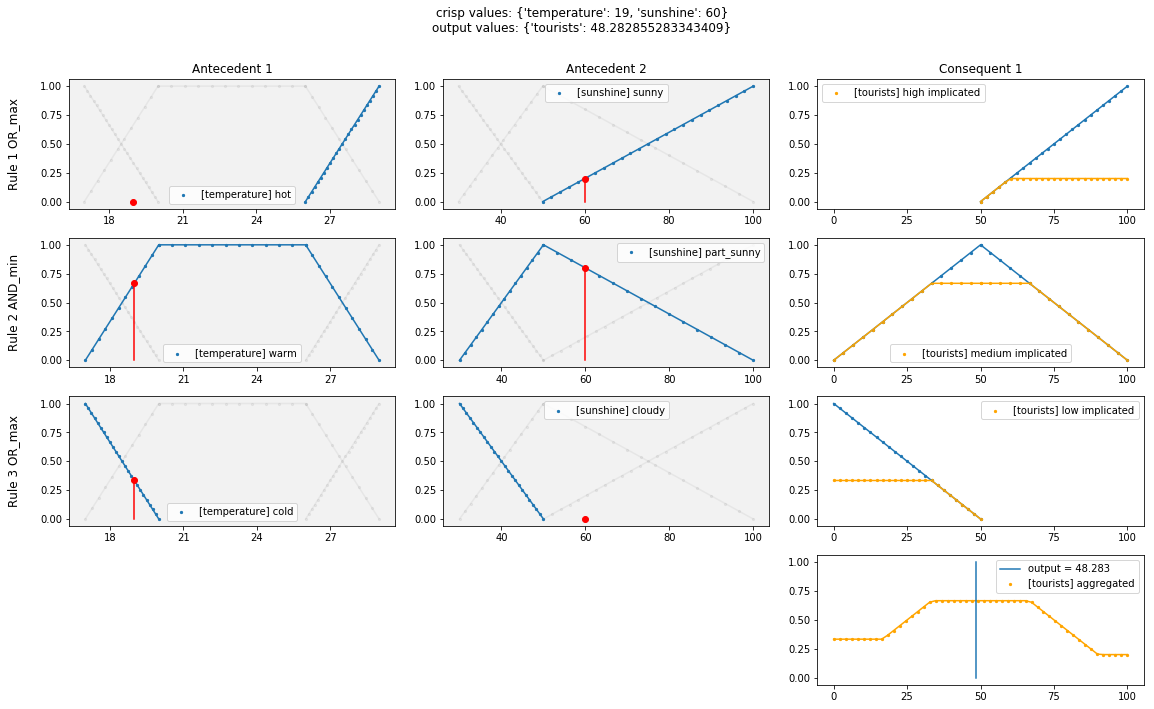

In [4]:
input_values = {'temperature': 19, 'sunshine': 60}
predicted_value = fis.predict(input_values)["tourists"]

expected_value = 48.3
print("predicted value: {}".format(predicted_value))
print("expected  value: {}".format(expected_value))
print("difference     : {}".format(expected_value - predicted_value))

fisv = FISViewer(fis, figsize=(16, 10))

fis.describe()
#fisv.save("/tmp/out.png")
fisv.show()

### Explore linguistic variables

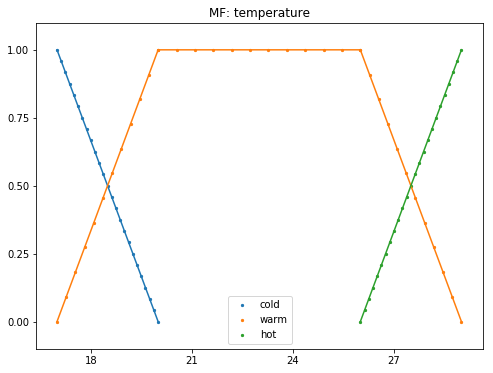

In [5]:
from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer

lv_viewer = LinguisticVariableViewer(lv_temperature)
#lv_viewer.fuzzify(19)

### Explore membership functions

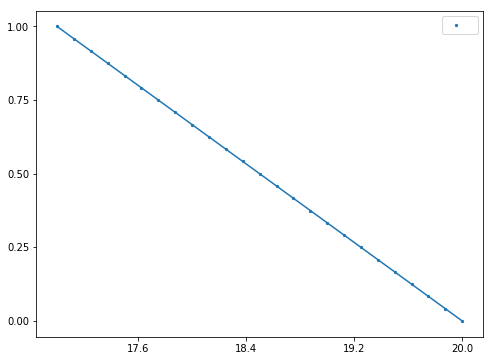

In [6]:
from fuzzy_systems.view.mf_viewer import MembershipFunctionViewer

mf = lv_temperature["cold"]
lv_viewer = MembershipFunctionViewer(mf)
#lv_viewer.fuzzify(19)

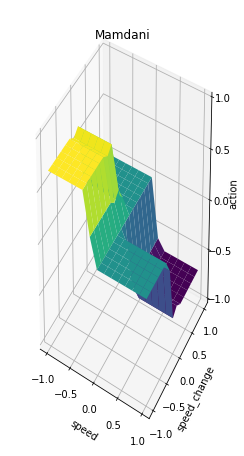

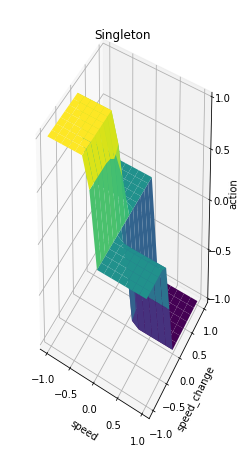

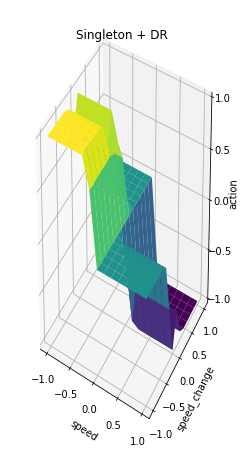

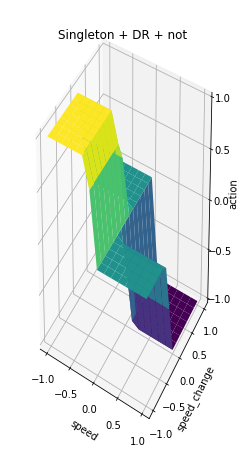

In [7]:
from matplotlib import pyplot as plt

from fuzzy_systems.examples.car_problem_slides.car_problem_default_rule import \
    car_accel_problem as cap_default_rule
from fuzzy_systems.examples.car_problem_slides.car_problem_default_rule_and_not import \
    car_accel_problem as cap_default_rule_and_not
from fuzzy_systems.examples.car_problem_slides.car_problem_mamdani import \
    car_accel_problem as cap_mamdani
from fuzzy_systems.examples.car_problem_slides.car_problem_singleton import \
    car_accel_problem as cap_singleton
from fuzzy_systems.view.fis_surface import show_surface

fis_mamdani = cap_mamdani()
fis_singleton = cap_singleton()
fis_default_rule = cap_default_rule()
fis_default_rule_and_not = cap_default_rule_and_not()

show_surface(fis_mamdani, title="Mamdani", x_label="speed", y_label="speed_change",
             z_label="action",
             n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

show_surface(fis_singleton,title="Singleton",  x_label="speed", y_label="speed_change",
             z_label="action",
             n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

show_surface(fis_default_rule, title="Singleton + DR", x_label="speed", y_label="speed_change",
             z_label="action",
             n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

show_surface(fis_default_rule_and_not, title="Singleton + DR + not", x_label="speed",
             y_label="speed_change",
             z_label="action",
             n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

plt.show()